In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv('./Dataset/data.csv')
dataset.head()

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset = np.array(dataset)

In [5]:
dataset.shape

(99, 2)

In [6]:
split_factor = 0.8
split = int(split_factor * dataset.shape[0])
split

79

In [10]:
#Splitting dataset into train and test data
X_train = dataset[:split,0].reshape(-1,1)
X_test = dataset[split:,0].reshape(-1,1)
y_train = dataset[:split,1]
y_test = dataset[split:,1]

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 1)
(20, 1)
(79,)
(20,)


In [12]:
def cost(X,y,m,c):
    error = 0
    for i in range(len(X)):
        error += (y[i] - (m * X[i] + c)) ** 2
    
    return error / (2 * len(X))

In [13]:
def step_gradient(X,y,m,c,lr):
    slope = 0
    intercept = 0
    for i in range(len(X)):
        slope += (1/len(X)) * (y[i] - (m * X[i] + c)) * X[i]
        intercept += (1/len(X)) * (y[i] - (m * X[i] + c))
    
    m += lr * slope
    c += lr * intercept
    return [m,c]

In [22]:
def gradient(X,y,m,c,lr,num_steps):
    for i in range(num_steps):
        m,c = step_gradient(X,y,m,c,lr)
        if (i%100 == 0 or i == num_steps-1):
            error = cost(X,y,m,c)
            print("error after {} iterations {}".format(i,error))
    
    return [m,c]

In [23]:
def run(X,y,num_steps = 1000):
    learning_rate = 0.0001
    error = 0
    m = 0
    c = 0
    m,c = gradient(X,y,m,c,learning_rate,num_steps)
    error = cost(X,y,m,c)
    
    return [m,c,error]

In [24]:
m,c,error = run(X_train,y_train)

error after 0 iterations [1558.23821461]
error after 100 iterations [56.73454658]
error after 200 iterations [56.73396968]
error after 300 iterations [56.73339318]
error after 400 iterations [56.73281708]
error after 500 iterations [56.73224138]
error after 600 iterations [56.73166608]
error after 700 iterations [56.73109118]
error after 800 iterations [56.73051668]
error after 900 iterations [56.72994258]
error after 999 iterations [56.72937461]


In [25]:
print("slope : {}".format(m))
print("intercept : {}".format(c))
print("error : {}".format(error))

slope : [1.46210032]
intercept : [0.05281994]
error : [56.72937461]


In [26]:
y_pred = m * X_test + c
y_pred.shape

(20, 1)

Text(0,0.5,'Y-axis')

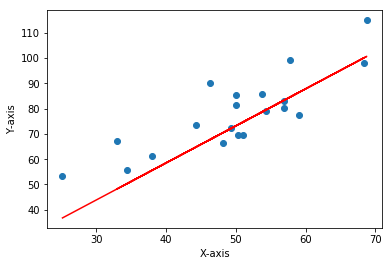

In [27]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [28]:
#error on test data
error = cost(X_test,y_test,m,c)
print("error on test set : {}".format(error))

error on test set : [52.8805332]


#### Lets see how scikit learn LinearRegression model perform on this dataset

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [30]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [31]:
m = regressor.coef_
c = regressor.intercept_
print("slope : {}".format(m))
print("intercept : {}".format(c))

slope : [1.32609818]
intercept : 6.951165533061257


In [32]:
error = cost(X_train,y_train,m,c)
print(error)

[55.90320444]


Text(0,0.5,'Y-axis')

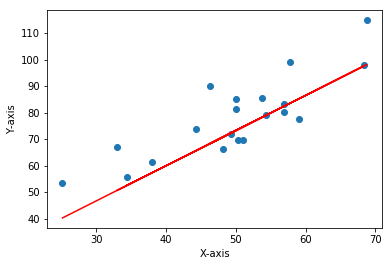

In [33]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,'r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [34]:
#error on test data
error = cost(X_test,y_test,m,c)
print("error on test set : {}".format(error))

error on test set : [48.2654309]
